<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/3_Hyper_Parameters_and_Tuning_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model Hyperparameter Optimization**

**Hyperparameter:** Model configuration argument specified by the developer to guide the learning process for a specific dataset.

Machine learning models also have parameters, which are the internal coefficients set by training or optimizing the model on a training dataset.

Parameters are different from hyperparameters. Parameters are learned automatically; hyperparameters are set manually to help guide the learning process.



**What is a Model Parameter?**
A model parameter is a configuration variable that is **internal to the model and whose value can be estimated from data.**



1.   They are required by the model when making predictions.
2.   They values define the skill of the model on your problem.
3.   They are estimated or learned from data.
4.   They are often not set manually by the practitioner.
5.   They are often saved as part of the learned model.

Parameters are key to machine learning algorithms. They are the part of the model that is learned from historical training data.

**In classical machine learning literature,** we may think of the model as the hypothesis and **the parameters as the tailoring of the hypothesis to a specific set of data.**

**What is a Model Hyperparameter?**


A model hyperparameter is a configuration that is **external **to the model and **whose value cannot be estimated from data.**



1.   They are often used in processes to help estimate model parameters.
2.   They are often specified by the practitioner.
3.   They can often be set using heuristics.
4.   They are often tuned for a given predictive modeling problem.


We **cannot know the best value for a model hyperparameter on a given problem.**
When a machine learning algorithm is tuned for a specific problem, such as when you are using a **grid search or a random search**, then you are tuning the hyperparameters of the model or order to discover the parameters of the model that result in the most skillful predictions.

**Some examples of model hyperparameters include:**

The **learning rate** for training a neural network.
The **C** and **sigma** hyperparameters for **support vector machines.**
The **k** in **k-nearest neighbors.**

### Hyperparameters and Model Validation

We are familiar with testing machine learning models by dividing the entire set into disjoint training and test sets depending on a predetermined test size ratio.

This technique is known as train test split.

We then use the training set to "fit" the model, and the test set to assess its performance.

This approach is known as "hold-out sampling".

A more reliable and systematic way to hold-out sampling is "cross-validation", which is what we are going to discuss in this notebook.

In [ ]:
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import preprocessing

In [ ]:
# importing the iris dataset
df = load_iris()

In [ ]:
# specifying data and target
Data, target = df.data, df.target

In [ ]:
# normalizing the Data by rescaling it from the original range so that all values are within same range.
Data = preprocessing.MinMaxScaler().fit_transform(Data)
Data

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Model validation the wrong way

A model and hyperparameters are selected. Here, a k-neighbors classifier with n_neighbors=1 will be used.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

Training the model, and using it to predict.

In [ ]:
model.fit(Data, target)
target_model = model.predict(Data)

finally we get the accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(target, target_model)

1.0

The accuracy score is 1.0, meaning that our model correctly classified 100% of the points.

Which is wrong as this approach contains a fundamental flaw:

 it trains and evaluates the model on the same data.

**Training, Validation, and Test Sets**

Splitting your dataset is essential for an unbiased evaluation of prediction performance. In most cases, it’s enough to split your dataset randomly into three subsets:


**The training set**
 is applied to **train, or fit, your model**. For example, you use the training set to find the optimal weights, or coefficients, for linear regression, logistic regression, or neural networks.


**The validation set** is used for unbiased model evaluation during hyperparameter tuning. For example, when you want to find the optimal number of neurons in a neural network or the best kernel for a support vector machine, you experiment with different values. For each considered setting of hyperparameters, you fit the model with the training set and assess its performance with the validation set.


**The test set** is needed for an unbiased evaluation of **the final model.** You shouldn’t use it for fitting or validation.



---



**In less complex cases, when you don’t have to tune hyperparameters, it’s okay to work with only the training and test sets.**

#### Model validation the right way: Holdout sets

In this approach a portion of subset is held back from the training of the model, and then it is used to check the model performance.

In [ ]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(Data, target, random_state=0,
                                  train_size=0.5)

**random_state** is the object that controls randomization during splitting. It can be either an int or an instance of RandomState. The default value is None.



> You probably got different results from what you see here. This is because dataset **splitting is random by default**. The result differs each time you run the function.


> To make your **tests reproducible**, you need a random split with the same output for each function call. **You can do that with the parameter random_state.**






**shuffle** is the Boolean object (True by default) that determines whether to shuffle the dataset before applying the split.


**stratify** is an array-like object that, if not None, determines how to use a stratified split.

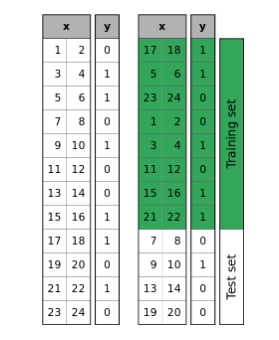

Using only one set of data to fit the model

In [ ]:
model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

Then using **the second set of data, model is evaluated.**

In [ ]:
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9466666666666667

As seen the nearest-neighbor classifier is about 94% accurate on this hold-out set. Which is much more reasonable. So, how can we improve this score? One method is to **search the group of hyperparameters** that results in the highest accuracy rating.

To get the best set of hyperparameters there are few approaches readily available like **Random search, Bayesian search, and Grid search**.

**Grid search** is the most common approach as it exhaustively searches through all possible **combinations of hyperparameters**, but before that the model is cross validated in order to **avoid overfitting**.

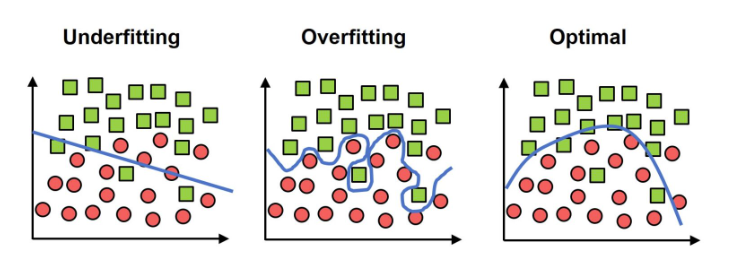

Finding the optimal tuning parameters for a machine learning problem can often be very difficult.

We may encounter **overfitting,** which means our machine learning model trains **too specifically on our training dataset** and causes higher levels of error when applied to our test/holdout datasets.

Or, we may run into **underfitting**, which means our model **doesn’t train specifically enough to our training dataset.** This also leads to higher levels of error when applied to test/holdout datasets.

#### Cross-validation

**Cross validation **works by splitting our dataset into **random groups,** holding **one group out as the test,** and training the model on the remaining groups. This process is repeated for **each group being held as the test group, **then the** average of t**he models is used for the resulting model.

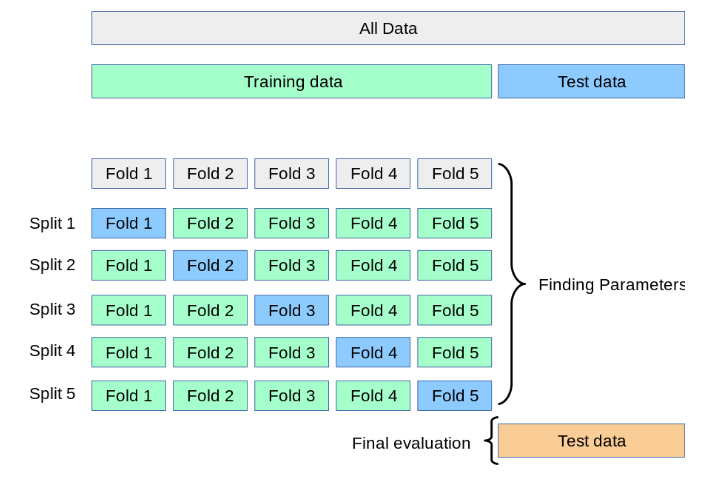

Cross validation is done by using k-folds method,

where 5-folds and 10-folds are most favourable.

For instance, the entire dataset is divided into 5 portions of equal size.

Training is done in the last four chunks, testing is done in the first chunk, and so on.

In the last iteration, the last chunk is used for testing and all the other chunks were used for training.

The final step is to average the results of these five tests to determine the cross-validation accuracy as a whole.

Fig below explains the whole iterations.

![](../assets/cross-validation-k-fold.png)

Below we are using the RepeatedKFold function from sklearn.model_selection where 5-fold (n_splits = 5) cross-validation with 3 repetitions (n_repeats = 3) is used.

In [ ]:
from sklearn.model_selection import RepeatedKFold

cv_method = RepeatedKFold(n_splits=5,
                          n_repeats=3,
                          random_state=9)

## random_state:

This parameter is used to seed the random number generator. Setting a random seed ensures that if you run the cross-validation multiple times, you'll get the same splits each time. This can be helpful for reproducibility.

#### Hyperparameter Tuning

In [ ]:
# dictionary of KNN parameters for the grid search
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
              # distance metrics assumptions
              'p': [1, 2, 5]}

Next the KNeighborsClassifier() and KNN_params as the model and the parameter dictionary are passed into the GridSearchCV function.

In [ ]:
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=params_KNN,
                      cv=cv_method)

'param_grid: This parameter represents the hyperparameter grid to search. It's a dictionary where the keys are the hyperparameter names, and the values are lists of values to try for each hyperparameter.

fitting KNN model using the full dataset.

In [ ]:
gs_KNN.fit(Data, target);

The best_score_ attribute can be used to extract the mean cross-validation accuracy using the ideal parameters.

In [ ]:
gs_KNN.best_score_

0.9644444444444444

In [ ]:
best_params = gs_KNN.best_params_
best_model = gs_KNN.best_estimator_


In [ ]:
best_params

{'n_neighbors': 1, 'p': 5}

In [ ]:
best_model

KNeighborsClassifier(n_neighbors=1, p=5)

As we can see the best score is almost 97% accurate using the K-fold and cross validations.

## Homework/Class exercise:
Your objective is to load Boston Housing Data or Breast Cancer Data or Wine Data from sklearn.datasets and tune its hyperparameters using a stratified repeated CV. Use a different preprocessing function for normalizing the data.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load Breast Cancer Data
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing function
scaler = StandardScaler()

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid to search
params_KNN = {'knn__n_neighbors': [3, 5, 7], 'knn__weights': ['uniform', 'distance']}

# Create a stratified repeated cross-validation object
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

# Create a pipeline with preprocessing and KNN
pipeline = Pipeline([('scaler', scaler), ('knn', knn)])
# Pipeline allows you to assemble several steps, where each step can be a transformer (e.g., preprocessing step) or an estimator (e.g., a model), into a single object.

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=params_KNN, cv=cv_method, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy}")


Best Hyperparameters: {'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Accuracy on Test Set: 0.9473684210526315


## Stratification:
It performs stratified sampling to ensure that each fold has the same distribution of target classes as the entire dataset. This is particularly useful when dealing with imbalanced datasets.
## Repetition:
It repeats the cross-validation procedure multiple times with different randomizations. This helps to obtain a more reliable estimate of the model performance.

## Stratified sampling

 is a sampling technique used in statistics and machine learning to ensure that the distribution of important characteristics (such as classes in a classification problem) is representative in each subset of the data. This helps prevent bias in the training and evaluation of models, particularly when dealing with imbalanced datasets.

In the context of cross-validation in machine learning, stratified sampling is often employed to ensure that each fold (subset) used for training and testing a model has a similar distribution of the target variable as the entire dataset. This is crucial in cases where the classes in the target variable are not evenly distributed.

## Here's a simplified example to illustrate the concept:

Suppose you have a binary classification problem with two classes, A and B. If your dataset has 80% of examples from class A and 20% from class B, stratified sampling ensures that each fold in cross-validation maintains this 80-20 ratio. Without stratification, you might end up with folds that have significantly different class distributions, leading to biased evaluations.

In summary, stratified sampling is about preserving the relative proportions of different groups or categories within a dataset when creating subsets, and it's particularly useful when working with imbalanced datasets or problems where maintaining the original class distribution is important for model evaluation.